In [ ]:
!pip install Wand

In [ ]:
!sudo apt-get install libmagickwand-dev

In [ ]:
import os
from PIL import Image
import os.path
import time
import torch
import torchvision.datasets as dset
import torchvision.transforms as trn
import torch.utils.data as data
import numpy as np

import skimage as sk
from skimage.filters import gaussian
from io import BytesIO
from wand.image import Image as WandImage
from wand.api import library as wandlibrary
import wand.color as WandColor
import ctypes
from PIL import Image as PILImage
import cv2
from scipy.ndimage import zoom as scizoom
from scipy.ndimage.interpolation import map_coordinates
import warnings

In [ ]:
# import data path
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/'


Mounted at /content/drive


# Motion Blur 

Motion Blur results from the rapid movement of objects or camera, or long exposure.

Reference: https://github.com/hendrycks/robustness/tree/master/ImageNet-C

## Sample

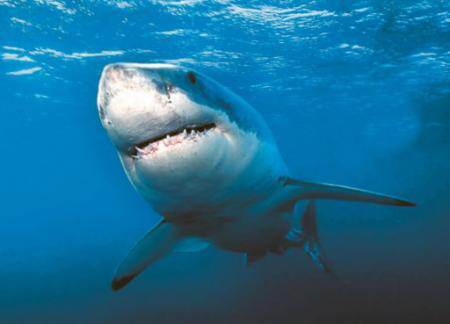

In [ ]:
# Read a sample image
img = Image.open(data_path+'pre_motion_blur_sample1.JPEG')
im = np.array(img)
input = img.convert('RGB')
img # Show Images

In [ ]:
# This function uses the MagickMotionBlurImage function of Wand library
def motion_blur(x, severity=1):
    c = [(10, 3), (15, 5), (15, 8), (15, 12), (20, 15)][severity - 1]

    output = BytesIO()
    x.save(output, format='PNG')
    x = MotionImage(blob=output.getvalue())

    x.motion_blur(radius=c[0], sigma=c[1], angle=np.random.uniform(-45, 45))

    x = cv2.cv2.imdecode(np.fromstring(x.make_blob(), np.uint8),
                     cv2.cv2.IMREAD_UNCHANGED)

    if x.shape != (224, 224):
        return np.clip(x[..., [2, 1, 0]], 0, 255)  # BGR to RGB
    else:  # greyscale to RGB
        return np.clip(np.array([x, x, x]).transpose((1, 2, 0)), 0, 255)

# Extend wand.image.Image class to include method signature
class MotionImage(WandImage):
    def motion_blur(self, radius=0.0, sigma=0.0, angle=0.0):
        wandlibrary.MagickMotionBlurImage(self.wand, radius, sigma, angle)

RGB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


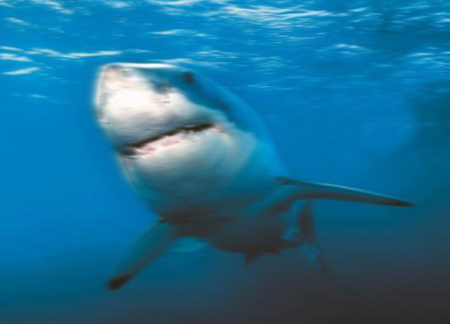

In [ ]:
im_out = motion_blur(input, 2)
pil_img = Image.fromarray(im_out)
print(pil_img.mode)# RGB
pil_img.save(data_path+'after_motion_blur_sample1_2.JPEG')
pil_img

RGB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


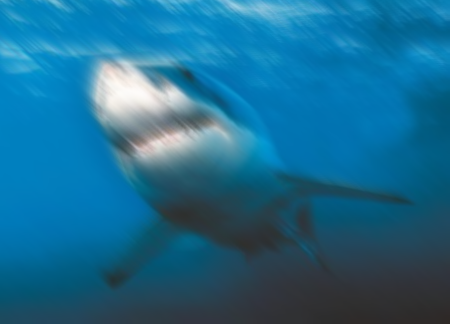

In [ ]:
im_out = motion_blur(input, 4)
pil_img = Image.fromarray(im_out)
print(pil_img.mode)# RGB
pil_img.save(data_path+'after_motion_blur_sample1_4.JPEG')
pil_img

## Actual Data Augmentation


In our experiment, we conduct the motion blur augmentation on the imagenet dataset. Using

`python make_imagenet_c_motionblur.py` to generate augmented datasets.


The output contains five folders, '1','2','3','4','5'. The numbers represent the severities of the augmentation. 


Then we use datasets after motion blur augmentation(severity = 2 and severity = 3) to train the models.

# Reference:

https://github.com/hendrycks/imagenet-r

https://github.com/hendrycks/robustness/tree/master/ImageNet-C

